In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report


In [2]:
df = pd.read_pickle("D:\\Datensätze\\Leaguify\\Prediction\\static_dataset(2).pkl")

In [3]:
df.head()

,gameDuration,gameCreation,gameVersion,mapId,queueId,patch,seasonId,platformId,participant1_level,participant1_tier,...,participant10_champion_kills,participant10_champion_deaths,participant10_champion_assists,participant10_champion_lp,participant10_champion_maxKills,participant10_champion_cs,participant10_champion_damage,participant10_champion_gold,participant10_teamId,participant10_win
0,1426,1696707216115,13.19.534.5972,11,420,19,13,EUW1,1218,GRANDMASTER,...,0.9,5.7,16.6,1,11,11.4,6652.0,7460.0,200,False
0,1335,1696865941131,13.19.534.5972,11,420,19,13,EUW1,535,MASTER,...,None,None,None,None,None,None,None,None,200,False
0,1688,1696919397289,13.19.534.5972,11,420,19,13,EUW1,120,GRANDMASTER,...,4.1,8.8,9.0,52,18,77.6,17178.0,9235.0,200,True
0,1348,1696010739613,13.19.533.1909,11,420,19,13,EUW1,1065,CHALLENGER,...,0.0,10.0,8.0,None,10,21.0,4344.0,4929.0,200,False
0,2243,1696700130487,13.19.534.5972,11,420,19,13,EUW1,215,MASTER,...,1.4,6.2,13.9,1,11,31.3,6684.0,7232.0,200,True


In [4]:
def drop_missing(df: pd.DataFrame):
    len_before = len(df)
    df.dropna(inplace=True, axis=0)
    print(f'dropped {len_before - len(df)} rows')

In [5]:
drop_missing(df)

dropped 2609 rows


In [6]:
def get_winning_team(df: pd.DataFrame):
    df['label'] = np.where(df['participant1_win'], 0, 1)  # 0 = team1 won, 1 = team2 won 

In [7]:
get_winning_team(df)

In [8]:
def drop_wrong_data(df: pd.DataFrame):
    len_before = len(df)
    df.drop(df[df['mapId'] != 11].index, inplace=True)
    df.drop(df[df['queueId'] != 420].index, inplace=True)
    df.drop(df[df['gameDuration'] < 900].index, inplace=True)
    df.drop(df[df['platformId'] != 'EUW1'].index, inplace=True)
    df.drop(df[df['seasonId'] != 13].index, inplace=True)
    df.drop(df[df['gameVersion'] != df['gameVersion'][0]].index, inplace=True)
    df.drop(df[df['patch'] != df['patch'][0]].index, inplace=True)
    print(f'dropped {len_before - len(df)} rows')

In [9]:
def drop_irrelevant(df: pd.DataFrame):
    irrelevant_cols = ['gameDuration', 'gameCreation', 'gameVersion', 'mapId', 'queueId', 'patch', 'seasonId',
                       'platformId']
    for i in range(1, 11):
        irrelevant_cols.append(f'participant{i}_win')
    df.drop(columns=irrelevant_cols, inplace=True)

In [10]:
drop_irrelevant(df)

In [11]:
df.reset_index(inplace=True, drop=True)
df

,participant1_level,participant1_tier,participant1_rank,participant1_leaguePoints,participant1_wins,participant1_losses,participant1_veteran,participant1_inactive,participant1_freshBlood,participant1_hotStreak,...,participant10_champion_kills,participant10_champion_deaths,participant10_champion_assists,participant10_champion_lp,participant10_champion_maxKills,participant10_champion_cs,participant10_champion_damage,participant10_champion_gold,participant10_teamId,label
0,1218,GRANDMASTER,1,653,306,278,False,False,True,False,...,0.9,5.7,16.6,1,11,11.4,6652.0,7460.0,200,0
1,485,MASTER,1,121,20,14,False,False,False,False,...,2.5,4.3,13.5,626,14,20.3,9617.0,8182.0,200,0
2,120,GRANDMASTER,1,629,217,194,True,False,False,False,...,4.5,6.1,10.4,139,11,35.5,16900.0,8442.0,200,0
3,1065,CHALLENGER,1,1318,306,252,True,False,False,False,...,1.4,5.9,14.2,172,13,29.6,5515.0,6900.0,200,0
4,779,CHALLENGER,1,1121,157,123,True,False,False,True,...,1.5,4.5,15.1,653,9,30.6,5021.0,7053.0,200,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4230,600,EMERALD,2,0,62,51,False,False,False,False,...,2.9,7.3,13.7,349,18,25.6,12502.0,8539.0,200,1
4231,560,MASTER,1,500,189,160,False,False,False,False,...,0.5,3.5,10.5,2,5,20.5,8361.0,7271.0,200,0
4232,867,EMERALD,1,75,6,1,False,False,False,False,...,1.2,4.8,13.6,6,7,9.2,6291.0,6717.0,200,1
4233,56,MASTER,1,194,131,112,True,False,False,False,...,6.4,4.8,7.4,47,14,38.7,8623.0,8628.0,200,1


In [12]:
from enum import Enum


class Rank(Enum):
    IRON = 0
    BRONZE = 1
    SILVER = 2
    GOLD = 3
    PLATINUM = 4
    EMERALD = 5
    DIAMOND = 6
    MASTER = 7
    GRANDMASTER = 8
    CHALLENGER = 9


def format_rank(tier: str, rank: str) -> str:
    return f'{tier}.{rank}'


def fix_rank(df: pd.DataFrame):
    for i in range(1, 11):
        df[f'participant{i}_tier'] = df[f'participant{i}_tier'].apply(lambda x: Rank[x].value)
        df.loc[:, f'participant{i}_tier'] = df.apply(
            lambda x: format_rank(x[f'participant{i}_tier'], x[f'participant{i}_rank']), axis=1)
        df[f'participant{i}_tier'] = df[f'participant{i}_tier'].astype(float)
        df.drop(columns=[f'participant{i}_rank'], inplace=True)

In [13]:
fix_rank(df)
df

,participant1_level,participant1_tier,participant1_leaguePoints,participant1_wins,participant1_losses,participant1_veteran,participant1_inactive,participant1_freshBlood,participant1_hotStreak,participant1_champion_lastPlayTime,...,participant10_champion_kills,participant10_champion_deaths,participant10_champion_assists,participant10_champion_lp,participant10_champion_maxKills,participant10_champion_cs,participant10_champion_damage,participant10_champion_gold,participant10_teamId,label
0,1218,8.1,653,306,278,False,False,True,False,1.696858e+12,...,0.9,5.7,16.6,1,11,11.4,6652.0,7460.0,200,0
1,485,7.1,121,20,14,False,False,False,False,1.696876e+12,...,2.5,4.3,13.5,626,14,20.3,9617.0,8182.0,200,0
2,120,8.1,629,217,194,True,False,False,False,1.696933e+12,...,4.5,6.1,10.4,139,11,35.5,16900.0,8442.0,200,0
3,1065,9.1,1318,306,252,True,False,False,False,1.696848e+12,...,1.4,5.9,14.2,172,13,29.6,5515.0,6900.0,200,0
4,779,9.1,1121,157,123,True,False,False,True,1.696795e+12,...,1.5,4.5,15.1,653,9,30.6,5021.0,7053.0,200,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4230,600,5.2,0,62,51,False,False,False,False,1.696887e+12,...,2.9,7.3,13.7,349,18,25.6,12502.0,8539.0,200,1
4231,560,7.1,500,189,160,False,False,False,False,1.696868e+12,...,0.5,3.5,10.5,2,5,20.5,8361.0,7271.0,200,0
4232,867,5.1,75,6,1,False,False,False,False,1.696679e+12,...,1.2,4.8,13.6,6,7,9.2,6291.0,6717.0,200,1
4233,56,7.1,194,131,112,True,False,False,False,1.696878e+12,...,6.4,4.8,7.4,47,14,38.7,8623.0,8628.0,200,1


In [14]:
cols = df.columns.tolist()
index = cols.index('label')
cols = cols[:index] + cols[index+1:] + [cols[index]]    # label as last column
df = df[cols]
def fix_teamId(df: pd.DataFrame):
    for i in range(1, 11):
        df[f'participant{i}_teamId'] = df[f'participant{i}_teamId'] // 100 - 1


In [15]:
fix_teamId(df)
df

,participant1_level,participant1_tier,participant1_leaguePoints,participant1_wins,participant1_losses,participant1_veteran,participant1_inactive,participant1_freshBlood,participant1_hotStreak,participant1_champion_lastPlayTime,...,participant10_champion_kills,participant10_champion_deaths,participant10_champion_assists,participant10_champion_lp,participant10_champion_maxKills,participant10_champion_cs,participant10_champion_damage,participant10_champion_gold,participant10_teamId,label
0,1218,8.1,653,306,278,False,False,True,False,1.696858e+12,...,0.9,5.7,16.6,1,11,11.4,6652.0,7460.0,1,0
1,485,7.1,121,20,14,False,False,False,False,1.696876e+12,...,2.5,4.3,13.5,626,14,20.3,9617.0,8182.0,1,0
2,120,8.1,629,217,194,True,False,False,False,1.696933e+12,...,4.5,6.1,10.4,139,11,35.5,16900.0,8442.0,1,0
3,1065,9.1,1318,306,252,True,False,False,False,1.696848e+12,...,1.4,5.9,14.2,172,13,29.6,5515.0,6900.0,1,0
4,779,9.1,1121,157,123,True,False,False,True,1.696795e+12,...,1.5,4.5,15.1,653,9,30.6,5021.0,7053.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4230,600,5.2,0,62,51,False,False,False,False,1.696887e+12,...,2.9,7.3,13.7,349,18,25.6,12502.0,8539.0,1,1
4231,560,7.1,500,189,160,False,False,False,False,1.696868e+12,...,0.5,3.5,10.5,2,5,20.5,8361.0,7271.0,1,0
4232,867,5.1,75,6,1,False,False,False,False,1.696679e+12,...,1.2,4.8,13.6,6,7,9.2,6291.0,6717.0,1,1
4233,56,7.1,194,131,112,True,False,False,False,1.696878e+12,...,6.4,4.8,7.4,47,14,38.7,8623.0,8628.0,1,1


In [16]:
def convert_booleans(df: pd.DataFrame):
    df.replace({True: 1, False: 0}, inplace=True)

In [17]:
convert_booleans(df)
df

,participant1_level,participant1_tier,participant1_leaguePoints,participant1_wins,participant1_losses,participant1_veteran,participant1_inactive,participant1_freshBlood,participant1_hotStreak,participant1_champion_lastPlayTime,...,participant10_champion_kills,participant10_champion_deaths,participant10_champion_assists,participant10_champion_lp,participant10_champion_maxKills,participant10_champion_cs,participant10_champion_damage,participant10_champion_gold,participant10_teamId,label
0,1218,8.1,653,306,278,0,0,1,0,1.696858e+12,...,0.9,5.7,16.6,1,11,11.4,6652.0,7460.0,1,0
1,485,7.1,121,20,14,0,0,0,0,1.696876e+12,...,2.5,4.3,13.5,626,14,20.3,9617.0,8182.0,1,0
2,120,8.1,629,217,194,1,0,0,0,1.696933e+12,...,4.5,6.1,10.4,139,11,35.5,16900.0,8442.0,1,0
3,1065,9.1,1318,306,252,1,0,0,0,1.696848e+12,...,1.4,5.9,14.2,172,13,29.6,5515.0,6900.0,1,0
4,779,9.1,1121,157,123,1,0,0,1,1.696795e+12,...,1.5,4.5,15.1,653,9,30.6,5021.0,7053.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4230,600,5.2,0,62,51,0,0,0,0,1.696887e+12,...,2.9,7.3,13.7,349,18,25.6,12502.0,8539.0,1,1
4231,560,7.1,500,189,160,0,0,0,0,1.696868e+12,...,0.5,3.5,10.5,2,5,20.5,8361.0,7271.0,1,0
4232,867,5.1,75,6,1,0,0,0,0,1.696679e+12,...,1.2,4.8,13.6,6,7,9.2,6291.0,6717.0,1,1
4233,56,7.1,194,131,112,1,0,0,0,1.696878e+12,...,6.4,4.8,7.4,47,14,38.7,8623.0,8628.0,1,1


In [18]:
from datetime import datetime

def convert_lastPlayTime(df: pd.DataFrame):
    for i in range(1, 11):
        df[f'participant{i}_champion_lastPlayTime'] = df[f'participant{i}_champion_lastPlayTime'].apply(
            lambda x: int((datetime.now() - datetime.fromtimestamp(x / 1000)).total_seconds()))

convert_lastPlayTime(df)
df

,participant1_level,participant1_tier,participant1_leaguePoints,participant1_wins,participant1_losses,participant1_veteran,participant1_inactive,participant1_freshBlood,participant1_hotStreak,participant1_champion_lastPlayTime,...,participant10_champion_kills,participant10_champion_deaths,participant10_champion_assists,participant10_champion_lp,participant10_champion_maxKills,participant10_champion_cs,participant10_champion_damage,participant10_champion_gold,participant10_teamId,label
0,1218,8.1,653,306,278,0,0,1,0,280878,...,0.9,5.7,16.6,1,11,11.4,6652.0,7460.0,1,0
1,485,7.1,121,20,14,0,0,0,0,262567,...,2.5,4.3,13.5,626,14,20.3,9617.0,8182.0,1,0
2,120,8.1,629,217,194,1,0,0,0,206070,...,4.5,6.1,10.4,139,11,35.5,16900.0,8442.0,1,0
3,1065,9.1,1318,306,252,1,0,0,0,290481,...,1.4,5.9,14.2,172,13,29.6,5515.0,6900.0,1,0
4,779,9.1,1121,157,123,1,0,0,1,343737,...,1.5,4.5,15.1,653,9,30.6,5021.0,7053.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4230,600,5.2,0,62,51,0,0,0,0,251722,...,2.9,7.3,13.7,349,18,25.6,12502.0,8539.0,1,1
4231,560,7.1,500,189,160,0,0,0,0,271109,...,0.5,3.5,10.5,2,5,20.5,8361.0,7271.0,1,0
4232,867,5.1,75,6,1,0,0,0,0,459819,...,1.2,4.8,13.6,6,7,9.2,6291.0,6717.0,1,1
4233,56,7.1,194,131,112,1,0,0,0,260901,...,6.4,4.8,7.4,47,14,38.7,8623.0,8628.0,1,1


In [19]:
# Check the total number of missing values in the dataset
total_missing = df.isnull().sum().sum()

# If there are missing values, display columns with the most missing values
if total_missing > 0:
    top_missing_columns = df.isnull().sum().sort_values(ascending=False).head(10)
else:
    top_missing_columns = None

total_missing, top_missing_columns

(0, None)

In [20]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

# Drop non-informative columns like 'Unnamed: 0' if present
if 'Unnamed: 0' in df.columns:
    data_final = df.drop('Unnamed: 0', axis=1)

# Separate features and target variable
X = df.drop('label', axis=1)
y = df['label']

# Encode categorical variables
for col in X.select_dtypes(include=['object']).columns:
    X[col] = LabelEncoder().fit_transform(X[col])

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape

((3388, 240), (847, 240))

In [21]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train the Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

# Predict on the test set
y_pred = gb_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

accuracy, class_report

(0.6989374262101535,
 '              precision    recall  f1-score   support\n\n           0       0.73      0.62      0.67       419\n           1       0.68      0.78      0.72       428\n\n    accuracy                           0.70       847\n   macro avg       0.70      0.70      0.70       847\nweighted avg       0.70      0.70      0.70       847\n')

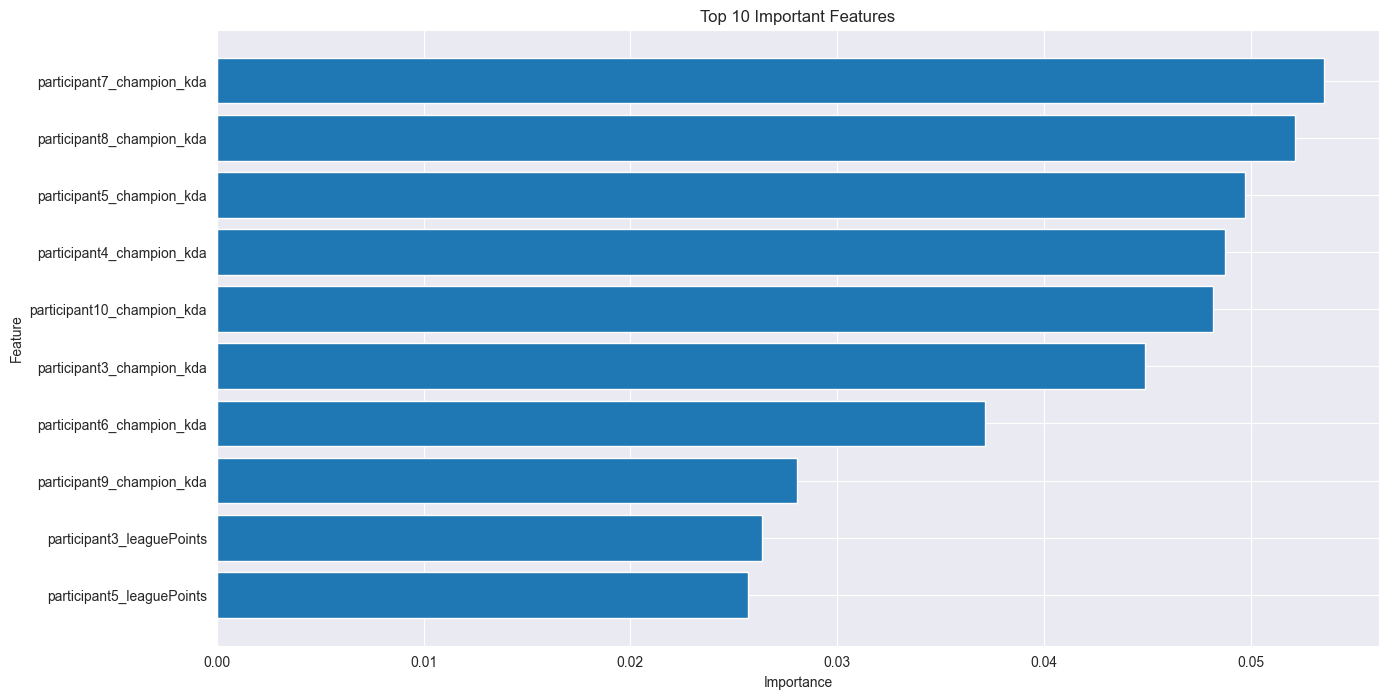

In [22]:
import matplotlib.pyplot as plt

# Get feature importance from the model
feature_importance = gb_model.feature_importances_

# Map features to their importance
features = dict(zip(X.columns, feature_importance))

# Sort features based on importance
sorted_features = sorted(features.items(), key=lambda x: x[1], reverse=True)[:10]

# Plot the top 10 features
plt.figure(figsize=(15, 8))
plt.barh([x[0] for x in sorted_features], [x[1] for x in sorted_features])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 10 Important Features')
plt.gca().invert_yaxis()
plt.show()

In [23]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model's performance
accuracy_rf = accuracy_score(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)

accuracy_rf, class_report_rf

(0.6658795749704841,
 '              precision    recall  f1-score   support\n\n           0       0.72      0.53      0.61       419\n           1       0.64      0.79      0.71       428\n\n    accuracy                           0.67       847\n   macro avg       0.68      0.66      0.66       847\nweighted avg       0.68      0.67      0.66       847\n')

In [24]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

In [25]:
# Convert data into PyTorch tensors
X_train_tensor = torch.FloatTensor(X_train)
y_train_tensor = torch.FloatTensor(y_train.to_numpy()).unsqueeze(1)
X_test_tensor = torch.FloatTensor(X_test)
y_test_tensor = torch.FloatTensor(y_test.to_numpy()).unsqueeze(1)

# Create data loaders
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

In [26]:
class DeepNeuralNetwork(nn.Module):
    def __init__(self, input_dim):
        super(DeepNeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_dim, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 128)
        self.fc4 = nn.Linear(128, 64)
        self.fc5 = nn.Linear(64, 32)
        self.fc6 = nn.Linear(32, 16)
        self.fc7 = nn.Linear(16, 1)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.5)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.relu(self.fc3(x))
        x = self.dropout(x)
        x = self.relu(self.fc4(x))
        x = self.dropout(x)
        x = self.relu(self.fc5(x))
        x = self.dropout(x)
        x = self.relu(self.fc6(x))
        x = self.sigmoid(self.fc7(x))
        return x

model = DeepNeuralNetwork(X_train.shape[1])

In [30]:
# Loss and optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 1000
for epoch in range(num_epochs):
    for batch_idx, (data, targets) in enumerate(train_loader):
        # Forward pass
        scores = model(data)
        loss = criterion(scores, targets)
        
        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}")

Epoch 1/1000, Loss: 0.0029
Epoch 2/1000, Loss: 0.0121
Epoch 3/1000, Loss: 0.0137
Epoch 4/1000, Loss: 0.0083
Epoch 5/1000, Loss: 0.0274
Epoch 6/1000, Loss: 0.1095
Epoch 7/1000, Loss: 0.0569
Epoch 8/1000, Loss: 0.0643
Epoch 9/1000, Loss: 0.0357
Epoch 10/1000, Loss: 0.0075
Epoch 11/1000, Loss: 0.0237
Epoch 12/1000, Loss: 0.0136
Epoch 13/1000, Loss: 0.0118
Epoch 14/1000, Loss: 0.0113
Epoch 15/1000, Loss: 0.0135
Epoch 16/1000, Loss: 0.0004
Epoch 17/1000, Loss: 0.0157
Epoch 18/1000, Loss: 0.0173
Epoch 19/1000, Loss: 0.0040
Epoch 20/1000, Loss: 0.0033
Epoch 21/1000, Loss: 0.0116
Epoch 22/1000, Loss: 0.0095
Epoch 23/1000, Loss: 0.0644
Epoch 24/1000, Loss: 0.0147
Epoch 25/1000, Loss: 0.0006
Epoch 26/1000, Loss: 0.0080
Epoch 27/1000, Loss: 0.0320
Epoch 28/1000, Loss: 0.1179
Epoch 29/1000, Loss: 0.0449
Epoch 30/1000, Loss: 0.0272
Epoch 31/1000, Loss: 0.1108
Epoch 32/1000, Loss: 0.1998
Epoch 33/1000, Loss: 0.0969
Epoch 34/1000, Loss: 0.0409
Epoch 35/1000, Loss: 0.0027
Epoch 36/1000, Loss: 0.0035
E

In [31]:
with torch.no_grad():
    test_scores = model(X_test_tensor)
    test_predictions = (test_scores > 0.5).float()
    accuracy = (test_predictions == y_test_tensor).float().mean().item()
    print(f"Test Accuracy: {accuracy*100:.2f}%")

Test Accuracy: 69.19%


In [29]:
import torch
import torchvision
from bayesian_torch.models.dnn_to_bnn import dnn_to_bnn, get_kl_loss

In [32]:
# Provided by you
X_train_tensor = torch.FloatTensor(X_train)
y_train_tensor = torch.FloatTensor(y_train.to_numpy()).unsqueeze(1)
X_test_tensor = torch.FloatTensor(X_test)
y_test_tensor = torch.FloatTensor(y_test.to_numpy()).unsqueeze(1)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

In [33]:
# Define the BNN prior parameters
const_bnn_prior_parameters = {
        "prior_mu": 0.0,
        "prior_sigma": 1.0,
        "posterior_mu_init": 0.0,
        "posterior_rho_init": -3.0,
        "type": "Reparameterization",
        "moped_enable": True,
        "moped_delta": 0.5,
}

# Get the deterministic pretrained model
model = torchvision.models.resnet18(pretrained=True)
# Convert it to a Bayesian model
dnn_to_bnn(model, const_bnn_prior_parameters)

C:\Programmieren\Leaguify_Website\venv\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Programmieren\Leaguify_Website\venv\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [34]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())

for epoch in range(num_epochs):  # Define num_epochs as per your preference
    for data, targets in train_loader:
        # Forward pass
        output = model(data)
        kl = get_kl_loss(model)
        ce_loss = criterion(output, targets.squeeze(1))
        loss = ce_loss + kl / len(train_loader.dataset)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}")

RuntimeError: Expected 3D (unbatched) or 4D (batched) input to conv2d, but got input of size: [32, 240]